<H1 align="center"> Aleksander Dosti - Q5 Notebook </H1> 

In [1]:
import os 
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../data/results/cleaned_bookings.csv').drop(['Unnamed: 0'], axis=1)
df['booking_date'] = pd.to_datetime(df['booking_date'], format='%Y-%m-%d')
df['departure_date'] = pd.to_datetime(df['departure_date'], format='%Y-%m-%d')
df.head()

,booking_ID,traveller_ID,company_ID,booking_date,departure_date,origin,destination,price_usd,status
0,4025741954330767167,301,2,2019-01-02,2019-04-20,Sao Paolo,Milano,67,BOOKED
1,5401900986077032623,286,12,2019-01-02,2019-04-16,Beijing,Brussels,150,BOOKED
2,7954793568595977968,136,12,2019-01-02,2019-04-28,Toronto,Budapest,594,BOOKED
3,2008916062229464357,442,18,2019-01-02,2019-03-03,Moscow,Dubai,532,BOOKED
4,3817049762679670509,249,25,2019-01-02,2019-04-27,Prague,Sydney,358,BOOKED


Let's first inspect for seasonality and how that impacts our data.

In [4]:
df = df[df['status'] == 'BOOKED']
df.head()

,booking_ID,traveller_ID,company_ID,booking_date,departure_date,origin,destination,price_usd,status
0,4025741954330767167,301,2,2019-01-02,2019-04-20,Sao Paolo,Milano,67,BOOKED
1,5401900986077032623,286,12,2019-01-02,2019-04-16,Beijing,Brussels,150,BOOKED
2,7954793568595977968,136,12,2019-01-02,2019-04-28,Toronto,Budapest,594,BOOKED
3,2008916062229464357,442,18,2019-01-02,2019-03-03,Moscow,Dubai,532,BOOKED
4,3817049762679670509,249,25,2019-01-02,2019-04-27,Prague,Sydney,358,BOOKED


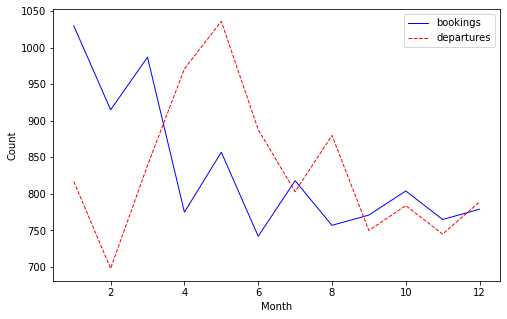

In [5]:
import matplotlib.pyplot as plt

booking_df = df.groupby([df.booking_date.dt.month])['price_usd'].count().reset_index().rename({'price_usd':'count', 'booking_date':'booking_month'}, axis=1)
departure_df = df.groupby([df.departure_date.dt.month])['price_usd'].count().reset_index().rename({'price_usd':'count', 'departure_date':'departure_month'}, axis=1)

plt.figure(figsize=(8, 5))
plt.plot(booking_df['booking_month'], booking_df['count'],
         color='blue',
         label='bookings',
         linewidth=1.0)

plt.plot(departure_df['departure_month'], departure_df['count'],
         color='red',
         linewidth=1.0,
         label='departures',
         linestyle='--'
        )

plt.xlabel("Month")
plt.ylabel("Count")
plt.legend()

plt.show()

We observe an interesting spike in departures being booked for April, one possible explanation for this is that prices are more affordable during this period. Indeed complementing this hypothesis are the, on average, lower prices for departures scheduled for April (see below).

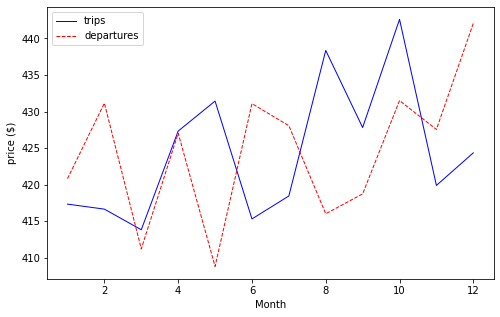

In [6]:
import matplotlib.pyplot as plt

trip_df = df.groupby([df.booking_date.dt.month])['price_usd'].mean().reset_index().rename({'booking_date':'booking_month'}, axis=1)
departure_df = df.groupby([df.departure_date.dt.month])['price_usd'].mean().reset_index().rename({'departure_date':'departure_month'}, axis=1)

plt.figure(figsize=(8, 5))
plt.plot(trip_df['booking_month'], trip_df['price_usd'],
         color='blue',
         label='trips',
         linewidth=1.0)

plt.plot(departure_df['departure_month'], departure_df['price_usd'],
         color='red',
         linewidth=1.0,
         label='departures',
         linestyle='--'
        )

plt.xlabel("Month")
plt.ylabel("price ($)")
plt.legend()

plt.show()

We also observe a continual increase in price from August to December, at the same time a decline in the number of departures departures can be observered for this same period. 

Therefore, by ensuring that prices are more affordable during this period may observe an increase in departures during this date period. 

Indeed, this would be complemented by improving the current targetting strategy used by JBT. For example, we note the histogram distribution of the difference in the number day between a trip date and the departure date shows that trips are most commonly booked 1-2 months in advance of a departure. 

Therefore, in targetting the months of June and October we would see sustained increases in the frequency of booking a trip. The ambition here is to produce continious demand for business travel throughout the year and improve quarterly outlook with respect to demand for business travel.

    (NOTE): A lag period of ~1 month is assumed within this notebook for a conversion to take effect, hence why the dates are not alligned.


In [8]:
df['diff_days'] = (df['departure_date'] - df['booking_date']) / np.timedelta64(1, 'D')

/home/adosti/work/cwt/.q5venv/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/adosti/work/cwt/.q5venv/lib/python3.10/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


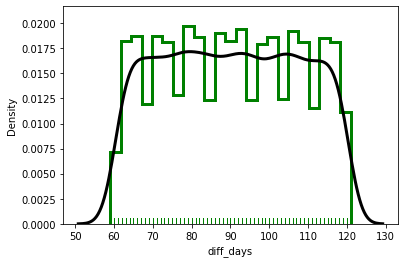

In [12]:
import seaborn as sns
ax = sns.distplot(df['diff_days'], rug=True, rug_kws={"color": "g"},
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})

Points of interest:
<ol>
<li> Mapping cities to country would make a rollup considerably easier, allowing us to see how demand across continents is impacted by seasonality. The sector in which a client operates in (e.g. Agriculture, Finance, Computing etc...) could also be factored in to better target a client according to their needs.
</li>

For instance, the spring season is ideal for harvesting certain types of crops, so we may notice an uptick in clients in the Agricultural sector visiting countries reliant on agricultural production to do business in this period. Noticing this, we would then be able to offer tailored services to said client.
</ol>